In [54]:
#Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.utils import resample

In [55]:
#Read the dataset
df = pd.read_csv('DataQN-for-ML.csv')
df['time'] = pd.to_datetime(df['time'], format='mixed', utc=True)
df.shape

(8760, 8)

In [56]:
df.head()

,time,rain_fall,temp,humidity,wind_direction,wind_speed,rain_now,rain_next_hour
0,2017-01-01 00:00:00+00:00,2.3,21.9,96,18,6,Yes,Yes
1,2017-01-01 01:00:00+00:00,1.7,21.9,96,14,1,Yes,No
2,2017-01-01 02:00:00+00:00,0.0,21.9,96,18,6,No,Yes
3,2017-01-01 03:00:00+00:00,0.2,21.8,95,18,6,Yes,No
4,2017-01-01 04:00:00+00:00,0.0,21.8,95,18,6,No,Yes


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   time            8760 non-null   datetime64[ns, UTC]
 1   rain_fall       8760 non-null   float64            
 2   temp            8760 non-null   float64            
 3   humidity        8760 non-null   int64              
 4   wind_direction  8760 non-null   int64              
 5   wind_speed      8760 non-null   int64              
 6   rain_now        8760 non-null   object             
 7   rain_next_hour  8760 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(2), int64(3), object(2)
memory usage: 547.6+ KB


In [59]:
#Check statistical measures of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
rain_fall,8760.0,0.350913,2.100442,0.0,0.0,0.0,0.0,58.8
temp,8760.0,26.886952,3.955504,17.0,24.3,26.5,29.3,38.7
humidity,8760.0,88.333562,8.810621,48.0,84.0,92.0,95.0,99.0
wind_direction,8760.0,16.915411,3.397687,1.0,18.0,18.0,18.0,18.0
wind_speed,8760.0,5.166781,1.898357,0.0,6.0,6.0,6.0,6.0


In [60]:
#Check Null Values
df.isnull().sum()

time              0
rain_fall         0
temp              0
humidity          0
wind_direction    0
wind_speed        0
rain_now          0
rain_next_hour    0
dtype: int64

In [61]:
#Check Duplicate Values
df.duplicated().sum()

0

In [62]:
#Check unique values
df.nunique()

time              8760
rain_fall          151
temp               216
humidity            47
wind_direction      18
wind_speed           7
rain_now             2
rain_next_hour       2
dtype: int64

In [64]:
df['rain_now'].replace({'No': 0, 'Yes': 1},inplace = True)
df['rain_next_hour'].replace({'No': 0, 'Yes': 1},inplace = True)

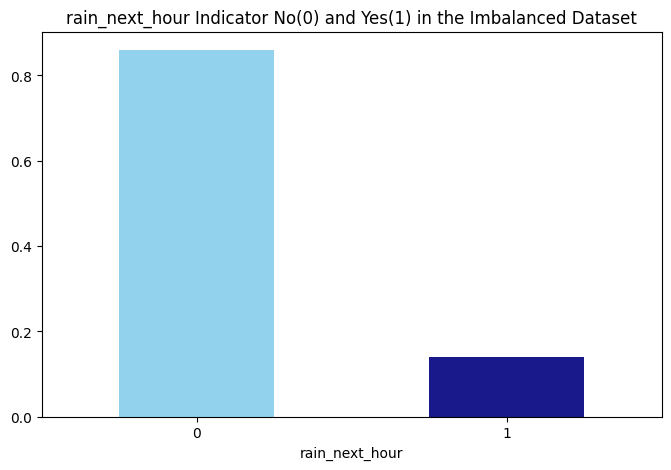

In [65]:
fig = plt.figure(figsize = (8,5))
df['rain_next_hour'].value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('rain_next_hour Indicator No(0) and Yes(1) in the Imbalanced Dataset')
plt.show()

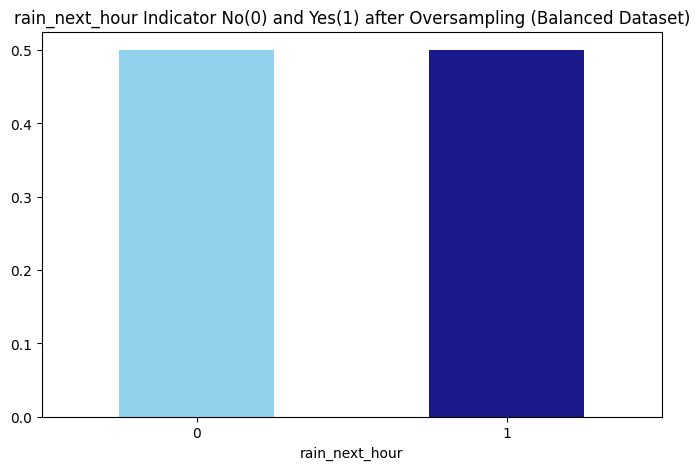

In [66]:
no = df[df.rain_next_hour == 0]
yes = df[df.rain_next_hour == 1]
yes_oversampled = resample(yes, replace=True, n_samples=len(no), random_state=123)
oversampled = pd.concat([no, yes_oversampled])

fig = plt.figure(figsize = (8,5))
oversampled.rain_next_hour.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('rain_next_hour Indicator No(0) and Yes(1) after Oversampling (Balanced Dataset)')
plt.show()

<Axes: >

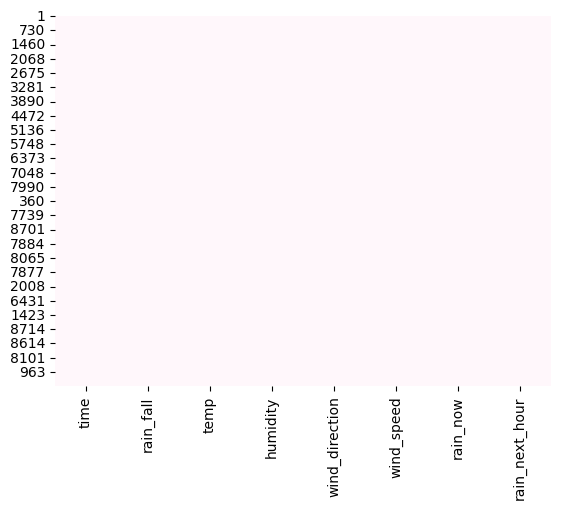

In [67]:
# Missing Data Pattern in Training Data
import seaborn as sns
sns.heatmap(oversampled.isnull(), cbar=False, cmap='PuBu')

In [70]:
oversampled.select_dtypes(include=['int64', 'float64', 'datetime64']).columns

Index(['rain_fall', 'temp', 'humidity', 'wind_direction', 'wind_speed',
       'rain_now', 'rain_next_hour'],
      dtype='object')